# 【TensorFlow1】

環境：
* Python 3.7.0
* tensorflow==1.13.0rc1

## TensorFlow概要

In [1]:
# 簡単な計算

import tensorflow as tf

a = tf.constant(5)
b = tf.constant(7)
add = tf.add(a, b)
sess = tf.Session()
output = sess.run(add)
print(output) # 12
sess.close()

/Users/teruitakahiro/opt/anaconda3/envs/data_science/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/teruitakahiro/opt/anaconda3/envs/data_science/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/teruitakahiro/opt/anaconda3/envs/data_science/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int1

12


In [2]:
# 簡単な計算：別解

import tensorflow as tf

a = tf.constant(5)
b = tf.constant(7)
add = tf.add(a, b)

with tf.Session() as sess:
    output = sess.run(add)
    print(output) # 12

12


In [3]:
# numpyで簡単な計算

import numpy as np
a_n = np.array(5)
b_n = np.array(7)
output_n = np.add(a_n, b_n)
print(output_n) # 12

12


## データフローグラフ

In [4]:
# データフローグラフの構築

a = tf.constant(5)
b = tf.constant(7)
add = tf.add(a, b)

In [5]:
# エッジ（Tensor）の説明を返す

print(a) # Tensor("Const:0", shape=(), dtype=int32)
print(add) # Tensor("Add:0", shape=(), dtype=int32)

Tensor("Const_4:0", shape=(), dtype=int32)
Tensor("Add_2:0", shape=(), dtype=int32)


In [6]:
# Sessionオブジェクトの作成

sess = tf.Session()

In [7]:
# sess.run()の中にエッジ（Tensor）を入れると出力が返る

output = sess.run(add)
print(output) # 12

12


### placeholder

In [8]:
# placeholder

c = tf.placeholder(tf.int32)
d = tf.placeholder(tf.int32)
add = tf.add(c, d)

sess = tf.Session()
output = sess.run(add, feed_dict={c:5, d:7})
print(output) # 12

12


In [9]:
# feed_dictのに辞書型で値を与える

output = sess.run(add, feed_dict={c:20, d:32})
print(output) # 52

52


In [10]:
add = a + b # tf.add(a, b)に等しい
print(add)

Tensor("add_4:0", shape=(), dtype=int32)


In [11]:
add = tf.add(a, b) # tf.add(a, b)に等しい
print(add)

Tensor("Add_5:0", shape=(), dtype=int32)


In [12]:
# セッションの終了

sess.close()

In [13]:
# with を使うとセッションのインスタンス化から終了まで行える

#with tf.Session() as sess:
#    sess.run() # ここに計算の実行コードを入れていく

# 【TensorFlow2】

## ロジスティック回帰の実装

#### データフローの作成

In [14]:
# データ作成

import numpy as np

x_train = np.array([[0,0],[0,1],[1,0],[1,1]])
y_train = np.array([[0],[0],[0],[1]])

In [15]:
# placeholder

import tensorflow as tf

x = tf.placeholder(tf.float32, [None, 2]) # [データ数、次元数]
t = tf.placeholder(tf.float32, [None, 1]) 

In [16]:
# Variable=学習により更新を行う値

W = tf.Variable(tf.zeros([2, 1]))
b = tf.Variable(tf.zeros([1]))

Instructions for updating:
Colocations handled automatically by placer.


In [17]:
# ロジスティック回帰 TensorFlow Ver.

y = tf.sigmoid(tf.matmul(x, W) + b) # 仮定関数をシグモイドに通した予測値
cross_entropy = tf.reduce_sum(-t * tf.log(y) - (1 - t) * tf.log(1 - y)) #Lossの計算

In [18]:
# 勾配降下法を用いてパラメータを最適化するためのコード

train_step = tf.train.GradientDescentOptimizer(0.1).minimize(cross_entropy)

In [19]:
correct_prediction = tf.equal(tf.sign(y - 0.5), tf.sign(t - 0.5)) # tf.equal()は引数の２値が等しいかの判定、tf.sign()は引数が正=1, 0=0, 負=-1

accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

#### 計算

In [20]:
# セッションのインスタンスを作成

sess = tf.Session()
sess.run(tf.global_variables_initializer()) # 初期化

In [21]:
# 学習 （sess.run()）

for epoch in range(1000):
    sess.run(train_step, feed_dict={
        x:x_train,
        t:y_train
    })
# 100回ごとに正解率を表示
    if epoch % 100 == 0:
        acc_val = sess.run(
            accuracy, feed_dict={
                x:x_train,
                t:y_train})
        print ('epoch: %d, Accuracy: %f'
               %(epoch, acc_val))

epoch: 0, Accuracy: 0.750000
epoch: 100, Accuracy: 1.000000
epoch: 200, Accuracy: 1.000000
epoch: 300, Accuracy: 1.000000
epoch: 400, Accuracy: 1.000000
epoch: 500, Accuracy: 1.000000
epoch: 600, Accuracy: 1.000000
epoch: 700, Accuracy: 1.000000
epoch: 800, Accuracy: 1.000000
epoch: 900, Accuracy: 1.000000


In [22]:
#学習結果が正しいか確認
classified = sess.run(correct_prediction, feed_dict={
    x:x_train,
    t:y_train
})

#出力yの確認
prob = sess.run(y, feed_dict={
    x:x_train,
    t:y_train
})

print(classified)
print(prob)

[[ True]
 [ True]
 [ True]
 [ True]]
[[1.9651403e-04]
 [4.9049813e-02]
 [4.9049813e-02]
 [9.3120378e-01]]


In [23]:
# 学習後のパラメータの確認

print('W:', sess.run(W))
print('b:', sess.run(b))

W: [[5.569955]
 [5.569955]]
b: [-8.53458]


In [24]:
# 途中経過を見る場合

mat = tf.matmul(x, W)
y = tf.sigmoid(mat + b)

print(sess.run(mat, feed_dict={
    x:x_train,
    t:y_train
}))

[[ 0.      ]
 [ 5.569955]
 [ 5.569955]
 [11.13991 ]]


In [25]:
# セッションの終了

sess.close()

# with構文
#with tf.Session() as sess:
#    sess.run() # ここに計算の実行コードを入れていく

# 【ディープラーニングフレームワーク1】

## 【問題1】スクラッチを振り返る

* ディープラーニングを実装するためにはどのようなものが必要だったかを列挙
  + 各処理を複数のクラスに分けてコーディングすること
    - 構成の主幹はレイヤークラスと、各処理を統合し実行するネットワーククラス
  + モデルに投入する入力サンプルは、ミニバッチに小分けにして投入する

## 【問題2】スクラッチとTensorFlowの対応を考える

In [26]:
class GetMiniBatch:
    
    """
    ミニバッチを取得するイテレータ
    Parameters
    ----------
    X : 次の形のndarray, shape (n_samples, n_features)
      訓練データ
    y : 次の形のndarray, shape (n_samples, 1)
      正解値
    batch_size : int
      バッチサイズ
    seed : int
      NumPyの乱数のシード
    """
    
    def __init__(self, X, y, batch_size = 10, seed=0):
        self.batch_size = batch_size
        np.random.seed(seed)
        shuffle_index = np.random.permutation(np.arange(X.shape[0]))
        self.X = X[shuffle_index]
        self.y = y[shuffle_index]
        self._stop = np.ceil(X.shape[0]/self.batch_size).astype(np.int)
    
    
    def __len__(self):
        return self._stop
    
    
    def __getitem__(self,item):
        p0 = item*self.batch_size
        p1 = item*self.batch_size + self.batch_size
        return self.X[p0:p1], self.y[p0:p1]
    
    
    def __iter__(self):
        self._counter = 0
        return self
    
    
    def __next__(self):
        if self._counter >= self._stop:
            raise StopIteration()
        p0 = self._counter*self.batch_size
        p1 = self._counter*self.batch_size + self.batch_size
        self._counter += 1
        return self.X[p0:p1], self.y[p0:p1]

In [27]:
"""
TensorFlowで実装したニューラルネットワークを使いIrisデータセットを2値分類する
"""
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import tensorflow as tf

# データセットの読み込み
df = pd.read_csv("Iris.csv")

# データフレームから条件抽出
df = df[(df["Species"] == "Iris-versicolor") | (df["Species"] == "Iris-virginica")]
y = df["Species"]
X = df.loc[:, ["SepalLengthCm", "SepalWidthCm", "PetalLengthCm", "PetalWidthCm"]]

# NumPy 配列に変換
X = np.array(X)
y = np.array(y)

# ラベルを数値に変換
y[y == "Iris-versicolor"] = 0
y[y == "Iris-virginica"] = 1
y = y.astype(np.int64)[:, np.newaxis]

# trainとtestに分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# さらにtrainとvalに分割
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=0)

In [28]:
# ハイパーパラメータの設定
learning_rate = 0.001
batch_size = 10
num_epochs = 100
n_hidden1 = 50
n_hidden2 = 100
n_input = X_train.shape[1]
n_samples = X_train.shape[0]
n_classes = 1

# 計算グラフに渡す引数の形を決める
X = tf.placeholder("float", [None, n_input])
Y = tf.placeholder("float", [None, n_classes])

# trainのミニバッチイテレータ
get_mini_batch_train = GetMiniBatch(X_train, y_train, batch_size=batch_size)

/Users/teruitakahiro/opt/anaconda3/envs/data_science/lib/python3.7/site-packages/ipykernel_launcher.py:23: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


In [29]:
def example_net(x):
    
    """
    単純な3層ニューラルネットワーク
    """
    
    tf.random.set_random_seed(0)
    
    # 重みとバイアスの宣言
    weights = {
                    'w1': tf.Variable(tf.random_normal([n_input, n_hidden1])),
                    'w2': tf.Variable(tf.random_normal([n_hidden1, n_hidden2])),
                    'w3': tf.Variable(tf.random_normal([n_hidden2, n_classes]))
                    }
    
    biases = {
                  'b1': tf.Variable(tf.random_normal([n_hidden1])),
                  'b2': tf.Variable(tf.random_normal([n_hidden2])),
                  'b3': tf.Variable(tf.random_normal([n_classes]))
                  }
    
    layer_1 = tf.add(tf.matmul(x, weights['w1']), biases['b1'])
    layer_1 = tf.nn.relu(layer_1)
    
    layer_2 = tf.add(tf.matmul(layer_1, weights['w2']), biases['b2'])
    layer_2 = tf.nn.relu(layer_2)
    
    layer_output = tf.matmul(layer_2, weights['w3']) + biases['b3'] # tf.addと+は等価である
    
    return layer_output

In [30]:
# ネットワーク構造の読み込み                               
logits = example_net(X)

# 目的関数
loss_op = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(labels=Y, logits=logits))

# 最適化手法
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)
train_op = optimizer.minimize(loss_op)

# 推定結果
correct_pred = tf.equal(tf.sign(Y - 0.5), tf.sign(tf.sigmoid(logits) - 0.5))

# 指標値計算
accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))

# variableの初期化
init = tf.global_variables_initializer()

In [31]:
# 計算グラフの実行
with tf.Session() as sess:
    
    sess.run(init)
    
    for epoch in range(num_epochs):
        # エポックごとにループ
        total_batch = np.ceil(X_train.shape[0]/batch_size).astype(np.int64)
        total_loss = 0
        total_acc = 0
        
        for i, (mini_batch_x, mini_batch_y) in enumerate(get_mini_batch_train):
            # ミニバッチごとにループ
            sess.run(train_op, feed_dict={X: mini_batch_x, Y: mini_batch_y})
            loss, acc = sess.run([loss_op, accuracy], feed_dict={X: mini_batch_x, Y: mini_batch_y})
            total_loss += loss
            
        total_loss /= n_samples
        val_loss, acc = sess.run([loss_op, accuracy], feed_dict={X: X_val, Y: y_val})
        print("Epoch {}, loss : {:.4f}, val_loss : {:.4f}, acc : {:.3f}".format(epoch, total_loss, val_loss, acc))
        
    test_acc = sess.run(accuracy, feed_dict={X: X_test, Y: y_test})
    print("test_acc : {:.3f}".format(test_acc))

Epoch 0, loss : 1.1735, val_loss : 11.2989, acc : 0.750
Epoch 1, loss : 1.2348, val_loss : 9.0602, acc : 0.500
Epoch 2, loss : 0.8924, val_loss : 10.3118, acc : 0.250
Epoch 3, loss : 0.7302, val_loss : 7.4508, acc : 0.500
Epoch 4, loss : 0.5668, val_loss : 6.7762, acc : 0.562
Epoch 5, loss : 0.5021, val_loss : 6.0707, acc : 0.500
Epoch 6, loss : 0.4315, val_loss : 5.5546, acc : 0.500
Epoch 7, loss : 0.3628, val_loss : 4.8130, acc : 0.625
Epoch 8, loss : 0.3143, val_loss : 4.2993, acc : 0.625
Epoch 9, loss : 0.2723, val_loss : 3.8846, acc : 0.688
Epoch 10, loss : 0.2389, val_loss : 3.6803, acc : 0.750
Epoch 11, loss : 0.2151, val_loss : 3.5043, acc : 0.750
Epoch 12, loss : 0.1950, val_loss : 3.3435, acc : 0.750
Epoch 13, loss : 0.1788, val_loss : 3.2810, acc : 0.750
Epoch 14, loss : 0.1685, val_loss : 3.1950, acc : 0.750
Epoch 15, loss : 0.1608, val_loss : 3.0991, acc : 0.750
Epoch 16, loss : 0.1526, val_loss : 3.0605, acc : 0.750
Epoch 17, loss : 0.1460, val_loss : 3.0014, acc : 0.750


## 【問題3】3種類全ての目的変数を使用したIrisのモデルを作成

In [32]:
"""
TensorFlowで実装したニューラルネットワークを使いIrisデータセットを3クラス分類する
"""

df = pd.read_csv("Iris.csv")
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [33]:
from sklearn.preprocessing import OneHotEncoder

# データフレームから条件抽出
y = df["Species"]
X = df.loc[:, ["SepalLengthCm", "SepalWidthCm", "PetalLengthCm", "PetalWidthCm"]]

# NumPy 配列に変換
X = np.array(X)
y = np.array(y)

# ラベルを数値に変換
y[y == "Iris-setosa"] = 0
y[y == "Iris-versicolor"] = 1
y[y == "Iris-virginica"] = 2

y = y.astype(np.int64)[:, np.newaxis]

enc = OneHotEncoder(handle_unknown='ignore', sparse=False)

y = enc.fit_transform(y)


# trainとtestに分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# さらにtrainとvalに分割
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=0)

In [34]:
# ハイパーパラメータの設定
learning_rate = 0.001
batch_size = 10
num_epochs = 100
n_hidden1 = 50
n_hidden2 = 100
n_input = X_train.shape[1]
n_samples = X_train.shape[0]
n_classes = 3

# 計算グラフに渡す引数の形を決める
X = tf.placeholder("float", [None, n_input])
Y = tf.placeholder("float", [None, n_classes])

# trainのミニバッチイテレータ
get_mini_batch_train = GetMiniBatch(X_train, y_train, batch_size=batch_size)

/Users/teruitakahiro/opt/anaconda3/envs/data_science/lib/python3.7/site-packages/ipykernel_launcher.py:23: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


In [35]:
def example_net(x):
    
    """
    単純な3層ニューラルネットワーク
    """
    
    tf.random.set_random_seed(0)
    
    # 重みとバイアスの宣言
    weights = {
                    'w1': tf.Variable(tf.random_normal([n_input, n_hidden1])),
                    'w2': tf.Variable(tf.random_normal([n_hidden1, n_hidden2])),
                    'w3': tf.Variable(tf.random_normal([n_hidden2, n_classes]))
                    }
    
    biases = {
                  'b1': tf.Variable(tf.random_normal([n_hidden1])),
                  'b2': tf.Variable(tf.random_normal([n_hidden2])),
                  'b3': tf.Variable(tf.random_normal([n_classes]))
                  }
    
    layer_1 = tf.add(tf.matmul(x, weights['w1']), biases['b1'])
    layer_1 = tf.nn.relu(layer_1)
    
    layer_2 = tf.add(tf.matmul(layer_1, weights['w2']), biases['b2'])
    layer_2 = tf.nn.relu(layer_2)
    
    layer_output = tf.matmul(layer_2, weights['w3']) + biases['b3'] # tf.addと+は等価である
    
    return layer_output

In [36]:
# ネットワーク構造の読み込み                               
logits = example_net(X) 

# 目的関数
loss_op = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(labels=Y, logits=logits)) 

# 最適化手法
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)
train_op = optimizer.minimize(loss_op)

# 推定結果
correct_pred = tf.equal(tf.argmax(Y, 1), tf.argmax(logits, 1))

# 指標値計算
accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))

# variableの初期化
init = tf.global_variables_initializer()

In [37]:
# 計算グラフの実行
with tf.Session() as sess:
    
    sess.run(init)
    
    for epoch in range(num_epochs):
        # エポックごとにループ
        #total_batch = np.ceil(X_train.shape[0]/batch_size).astype(np.int64)
        total_batch = np.ceil(n_samples/batch_size).astype(np.int64)
        total_loss = 0
        total_acc = 0
        
        for i, (mini_batch_x, mini_batch_y) in enumerate(get_mini_batch_train):
            # ミニバッチごとにループ
            sess.run(train_op, feed_dict={X: mini_batch_x, Y: mini_batch_y})
            loss, acc = sess.run([loss_op, accuracy], feed_dict={X: mini_batch_x, Y: mini_batch_y})
            total_loss += loss
            #print(loss, acc)
            print(sess.run([loss_op, accuracy], feed_dict={X: mini_batch_x, Y: mini_batch_y}))
            
        total_loss /= n_samples
        val_loss, acc = sess.run([loss_op, accuracy], feed_dict={X: X_val, Y: y_val})
        
        print('#'*35)
        print('### Epoch %i'%(epoch+1))
        print('#'*35)
        print("loss : {:.4f}, val_loss : {:.4f}, acc : {:.3f}".format(total_loss, val_loss, acc))
        print()
        
    test_acc = sess.run(accuracy, feed_dict={X: X_test, Y: y_test})
    print("test_acc : {:.3f}".format(test_acc))

[608.9496, 0.2]
[539.0508, 0.2]
[600.528, 0.1]
[232.42773, 0.6]
[501.8229, 0.3]
[422.5642, 0.3]
[296.91458, 0.4]
[292.49292, 0.4]
[305.6341, 0.5]
[346.5333, 0.16666667]
###################################
### Epoch 1
###################################
loss : 43.1971, val_loss : 364.7727, acc : 0.333

[466.98502, 0.2]
[406.08047, 0.2]
[445.63672, 0.1]
[164.91524, 0.6]
[375.681, 0.3]
[304.32355, 0.3]
[203.12856, 0.4]
[200.01492, 0.4]
[223.27902, 0.5]
[220.67456, 0.16666667]
###################################
### Epoch 2
###################################
loss : 31.3617, val_loss : 250.4902, acc : 0.333

[328.27313, 0.2]
[275.21887, 0.2]
[292.23557, 0.1]
[97.92427, 0.6]
[250.68636, 0.3]
[187.05533, 0.3]
[110.443665, 0.4]
[108.20325, 0.4]
[141.50002, 0.5]
[96.08071, 0.16666667]
###################################
### Epoch 3
###################################
loss : 19.6627, val_loss : 137.0865, acc : 0.333

[189.62016, 0.2]
[145.23221, 0.2]
[139.5466, 0.1]
[31.882618, 0.6]
[129.34737,

[0.14538088, 0.9]
[0.034933664, 1.0]
[0.0017554917, 1.0]
###################################
### Epoch 34
###################################
loss : 0.0108, val_loss : 0.2260, acc : 0.917

[0.012473734, 1.0]
[0.30029288, 0.8]
[0.025420213, 1.0]
[0.12311642, 0.9]
[0.19246486, 0.9]
[0.01717868, 1.0]
[0.1655228, 0.9]
[0.12904236, 0.9]
[0.03215584, 1.0]
[0.0015185393, 1.0]
###################################
### Epoch 35
###################################
loss : 0.0104, val_loss : 0.2290, acc : 0.917

[0.011079549, 1.0]
[0.294386, 0.8]
[0.022406409, 1.0]
[0.120365515, 0.9]
[0.18330485, 0.9]
[0.016554173, 1.0]
[0.16280189, 0.9]
[0.112563334, 0.9]
[0.029654134, 1.0]
[0.0012626626, 1.0]
###################################
### Epoch 36
###################################
loss : 0.0099, val_loss : 0.2307, acc : 0.917

[0.009072127, 1.0]
[0.28948194, 0.8]
[0.019985715, 1.0]
[0.117667876, 0.9]
[0.17411157, 0.9]
[0.015732301, 1.0]
[0.16103739, 0.9]
[0.098593056, 1.0]
[0.027404387, 1.0]
[0.0010572

[0.0521459, 1.0]
[0.0039555305, 1.0]
[0.021495685, 1.0]
[0.018350197, 1.0]
[0.0114783095, 1.0]
[6.77436e-05, 1.0]
###################################
### Epoch 68
###################################
loss : 0.0033, val_loss : 0.2237, acc : 0.917

[0.0006398812, 1.0]
[0.16437198, 0.8]
[0.003124802, 1.0]
[0.041960318, 1.0]
[0.05183791, 1.0]
[0.004014697, 1.0]
[0.020325536, 1.0]
[0.017836543, 1.0]
[0.011817185, 1.0]
[6.545932e-05, 1.0]
###################################
### Epoch 69
###################################
loss : 0.0033, val_loss : 0.2212, acc : 0.917

[0.0006195306, 1.0]
[0.1652852, 0.8]
[0.0030423545, 1.0]
[0.041059297, 1.0]
[0.0500189, 1.0]
[0.0036678724, 1.0]
[0.020666042, 1.0]
[0.018402504, 1.0]
[0.011930238, 1.0]
[6.589635e-05, 1.0]
###################################
### Epoch 70
###################################
loss : 0.0033, val_loss : 0.2224, acc : 0.917

[0.00062427303, 1.0]
[0.16180696, 0.8]
[0.0030783725, 1.0]
[0.03888711, 1.0]
[0.049733065, 1.0]
[0.0035896082,

## 【問題4】House Pricesのモデルを作成

In [38]:
"""
TensorFlowで実装したニューラルネットワークを使い回帰分析を行う
"""

df = pd.read_csv("house-prices-advanced-regression-techniques/train.csv")
X = df.loc[:, ["GrLivArea", "YearBuilt"]]
y = df["SalePrice"]
X

,GrLivArea,YearBuilt
0,1710,2003
1,1262,1976
2,1786,2001
3,1717,1915
4,2198,2000
...,...,...
1455,1647,1999
1456,2073,1978
1457,2340,1941
1458,1078,1950


In [39]:
y

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64

In [40]:
# NumPy 配列に変換
X = np.array(X)
y = np.array(y)
X, y

(array([[1710, 2003],
        [1262, 1976],
        [1786, 2001],
        ...,
        [2340, 1941],
        [1078, 1950],
        [1256, 1965]]),
 array([208500, 181500, 223500, ..., 266500, 142125, 147500]))

In [41]:
# 正規化

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
y_scaled = scaler.fit_transform(y.reshape(-1, 1))
X_scaled, y_scaled.shape

(array([[0.25923135, 0.94927536],
        [0.17483044, 0.75362319],
        [0.27354936, 0.93478261],
        ...,
        [0.37792012, 0.5       ],
        [0.14016579, 0.56521739],
        [0.17370008, 0.67391304]]),
 (1460, 1))

In [42]:
# trainとtestに分割
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=0)

# さらにtrainとvalに分割
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=0)

In [43]:
# ハイパーパラメータの設定
learning_rate = 0.001
batch_size = 10
num_epochs = 100
n_hidden1 = 50
n_hidden2 = 100
n_input = X_train.shape[1]
n_samples = X_train.shape[0]
n_classes = 1

# 計算グラフに渡す引数の形を決める
X = tf.placeholder("float", [None, n_input])
Y = tf.placeholder("float", [None, n_classes])

# trainのミニバッチイテレータ
get_mini_batch_train = GetMiniBatch(X_train, y_train, batch_size=batch_size)

/Users/teruitakahiro/opt/anaconda3/envs/data_science/lib/python3.7/site-packages/ipykernel_launcher.py:23: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


In [44]:
def example_net(x):
    
    """
    単純な3層ニューラルネットワーク
    """
    
    tf.random.set_random_seed(0)
    
    # 重みとバイアスの宣言
    weights = {
        'w1': tf.Variable(tf.random_normal([n_input, n_hidden1])),
        'w2': tf.Variable(tf.random_normal([n_hidden1, n_hidden2])),
        'w3': tf.Variable(tf.random_normal([n_hidden2, n_classes]))
    }
    biases = {
        'b1': tf.Variable(tf.random_normal([n_hidden1])),
        'b2': tf.Variable(tf.random_normal([n_hidden2])),
        'b3': tf.Variable(tf.random_normal([n_classes]))
    }
    layer_1 = tf.add(tf.matmul(x, weights['w1']), biases['b1'])
    layer_1 = tf.nn.relu(layer_1)
    layer_2 = tf.add(tf.matmul(layer_1, weights['w2']), biases['b2'])
    layer_2 = tf.nn.relu(layer_2)
    layer_output = tf.matmul(layer_2, weights['w3']) + biases['b3'] # tf.addと+は等価である
    return layer_output

In [45]:
# ネットワーク構造の読み込み                               
logits = example_net(X) 

# 目的関数
loss_op = tf.reduce_mean(tf.square(logits - Y)) 

# 最適化手法
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)
train_op = optimizer.minimize(loss_op)

# 推定結果、指標値計算は無し

# variableの初期化
init = tf.global_variables_initializer()

In [46]:
# 計算グラフの実行
with tf.Session() as sess:
    
    sess.run(init)
    train_loss_history = [] # lossを１エポック毎に保存するリスト
    val_loss_history = []
    
    for epoch in range(num_epochs):
        total_batch = np.ceil(X_train.shape[0]/batch_size).astype(np.int64)
        
        for i, (mini_batch_x, mini_batch_y) in enumerate(get_mini_batch_train):
            sess.run(train_op, feed_dict={X: mini_batch_x, Y: mini_batch_y})

        train_loss = sess.run([loss_op], feed_dict={X: mini_batch_x, Y: mini_batch_y}) # 分類問題の時に有ったaccuracyは消去
        train_loss_history.append(train_loss) # lossを１エポック毎に保存
            
        total_loss /= n_samples
        val_loss = sess.run([loss_op], feed_dict={X: X_val, Y: y_val})
        val_loss_history.append(val_loss)
        
        print('#'*25)
        print('### Epoch %i'%(epoch+1))
        print('#'*25)
        
        print("Train_loss" + str(train_loss))
        print("Val_loss" + str(val_loss))
        print()

#########################
### Epoch 1
#########################
Train_loss[4.816823]
Val_loss[6.065445]

#########################
### Epoch 2
#########################
Train_loss[1.8077507]
Val_loss[1.7634455]

#########################
### Epoch 3
#########################
Train_loss[0.17861679]
Val_loss[0.3171038]

#########################
### Epoch 4
#########################
Train_loss[0.09120981]
Val_loss[0.19986261]

#########################
### Epoch 5
#########################
Train_loss[0.055273972]
Val_loss[0.1392124]

#########################
### Epoch 6
#########################
Train_loss[0.03336028]
Val_loss[0.1044071]

#########################
### Epoch 7
#########################
Train_loss[0.022710968]
Val_loss[0.08332996]

#########################
### Epoch 8
#########################
Train_loss[0.017825974]
Val_loss[0.07089663]

#########################
### Epoch 9
#########################
Train_loss[0.016420892]
Val_loss[0.06288731]

########################

#########################
### Epoch 77
#########################
Train_loss[0.00036801153]
Val_loss[0.008534794]

#########################
### Epoch 78
#########################
Train_loss[0.00028591097]
Val_loss[0.008323734]

#########################
### Epoch 79
#########################
Train_loss[0.00059692934]
Val_loss[0.009463899]

#########################
### Epoch 80
#########################
Train_loss[0.0016068676]
Val_loss[0.011411827]

#########################
### Epoch 81
#########################
Train_loss[0.004102755]
Val_loss[0.015774058]

#########################
### Epoch 82
#########################
Train_loss[0.00596621]
Val_loss[0.018051976]

#########################
### Epoch 83
#########################
Train_loss[0.008488861]
Val_loss[0.021664822]

#########################
### Epoch 84
#########################
Train_loss[0.009003629]
Val_loss[0.021794397]

#########################
### Epoch 85
#########################
Train_loss[0.009448786]
Val_loss[

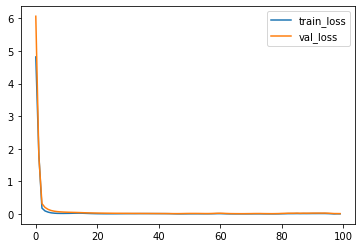

In [47]:
import matplotlib.pyplot as plt

plt.plot(np.arange(num_epochs), train_loss_history, label="train_loss")
plt.plot(np.arange(num_epochs), val_loss_history, label="val_loss")

plt.legend()

plt.show()

## 【問題5】MNISTのモデルを作成

In [48]:
import numpy as np
from tensorflow import keras

(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

In [49]:
# 平滑化
    
X_train = X_train.reshape(-1, 784)
X_test = X_test.reshape(-1, 784)

print(X_train.shape)
print(X_test.shape)

(60000, 784)
(10000, 784)


In [50]:
# 正規化

X_train = X_train.astype(float)
X_test = X_test.astype(float)
X_train /= 255
X_test /= 255

print(X_train.max()) # 1.0
print(X_train.min()) # 0.0

1.0
0.0


In [51]:
# One-Hot 表現に符号化

from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder(handle_unknown='ignore', sparse=False)
y_train = enc.fit_transform(y_train[:, np.newaxis])
y_test = enc.transform(y_test[:, np.newaxis])

print(y_train.shape) # (60000,)
print(y_train[:5])

(60000, 10)
[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


In [52]:
# 8:2にtrain_test_split

from sklearn.model_selection import train_test_split

# trainとvalに分割
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=0)
X_train.shape, y_train.shape

((48000, 784), (48000, 10))

In [53]:
# ハイパーパラメータの設定
learning_rate = 0.01 # 0.001 → 0.01
batch_size = 20 # 10 → 20
num_epochs = 20 # 100 → 20
n_hidden1 = 400 # 50 → 400
n_hidden2 = 100 # 100 → 200
n_input = X_train.shape[1] # 784
n_samples = X_train.shape[0] # 48000
n_classes = 10 # 3 → 10

# 計算グラフに渡す引数の形を決める
X = tf.placeholder("float", [None, n_input])
Y = tf.placeholder("float", [None, n_classes])

# trainのミニバッチイテレータ
get_mini_batch_train = GetMiniBatch(X_train, y_train, batch_size=batch_size)

/Users/teruitakahiro/opt/anaconda3/envs/data_science/lib/python3.7/site-packages/ipykernel_launcher.py:23: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


In [54]:
def example_net(x):
    
    """
    単純な3層ニューラルネットワーク
    """
    
    tf.random.set_random_seed(0)
    
    # 重みとバイアスの宣言
    weights = {
                     'w1': tf.Variable(tf.random_normal([n_input, n_hidden1])),
                     'w2': tf.Variable(tf.random_normal([n_hidden1, n_hidden2])),
                     'w3': tf.Variable(tf.random_normal([n_hidden2, n_classes]))
                     }
    
    biases = {
                   'b1': tf.Variable(tf.random_normal([n_hidden1])),
                   'b2': tf.Variable(tf.random_normal([n_hidden2])),
                   'b3': tf.Variable(tf.random_normal([n_classes]))
                   }
    
    layer_1 = tf.add(tf.matmul(x, weights['w1']), biases['b1'])
    layer_1 = tf.keras.activations.sigmoid(layer_1) # tf.nn.relu() → sigmoid()
    
    layer_2 = tf.add(tf.matmul(layer_1, weights['w2']), biases['b2'])
    layer_2 = tf.keras.activations.sigmoid(layer_2) # tf.nn.relu() → sigmoid()
    
    layer_output = tf.matmul(layer_2, weights['w3']) + biases['b3']
    
    return layer_output

In [55]:
# ネットワーク構造の読み込み                               
logits = example_net(X) 

# 目的関数
loss_op = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(labels=Y, logits=logits)) 

# 最適化手法
optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate) #Adam → GD
train_op = optimizer.minimize(loss_op)

# 推定結果
correct_pred = tf.equal(tf.argmax(Y, 1), tf.argmax(logits, 1))

# 指標値計算
accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))

# variableの初期化
init = tf.global_variables_initializer()

In [56]:
# 計算グラフの実行
with tf.Session() as sess:
    
    sess.run(init)
    train_loss_history2 = [] # train_lossを１エポック毎に保存するリスト
    val_loss_history2 = [] # val_lossを１エポック毎に保存するリスト
    
    for epoch in range(num_epochs):
        total_batch = np.ceil(n_samples/batch_size).astype(np.int64)
        total_loss = 0
        total_acc = 0
        
        for i, (mini_batch_x, mini_batch_y) in enumerate(get_mini_batch_train):
            sess.run(train_op, feed_dict={X: mini_batch_x, Y: mini_batch_y})
            loss, acc = sess.run([loss_op, accuracy], feed_dict={X: mini_batch_x, Y: mini_batch_y})
            total_loss += loss
            
        total_loss /= n_samples
        val_loss, acc = sess.run([loss_op, accuracy], feed_dict={X: X_val, Y: y_val})
        
        train_loss_history2.append(total_loss) #リストにappend
        val_loss_history2.append(val_loss)
        
        print('#'*35)
        print('### Epoch %i'%(epoch+1))
        print('#'*35)
        print("loss : {:.4f}, val_loss : {:.4f}, acc : {:.3f}".format(total_loss, val_loss, acc))
        print()
        
    test_acc = sess.run(accuracy, feed_dict={X: X_test, Y: y_test})
    print("test_acc : {:.3f}".format(test_acc))

###################################
### Epoch 1
###################################
loss : 0.1153, val_loss : 1.4030, acc : 0.571

###################################
### Epoch 2
###################################
loss : 0.0552, val_loss : 0.9986, acc : 0.677

###################################
### Epoch 3
###################################
loss : 0.0428, val_loss : 0.8297, acc : 0.730

###################################
### Epoch 4
###################################
loss : 0.0367, val_loss : 0.7332, acc : 0.760

###################################
### Epoch 5
###################################
loss : 0.0329, val_loss : 0.6692, acc : 0.782

###################################
### Epoch 6
###################################
loss : 0.0303, val_loss : 0.6229, acc : 0.798

###################################
### Epoch 7
###################################
loss : 0.0282, val_loss : 0.5872, acc : 0.810

###################################
### Epoch 8
###################################

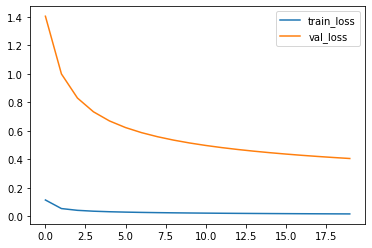

In [57]:
# plot

plt.plot(np.arange(num_epochs), train_loss_history2, label="train_loss")
plt.plot(np.arange(num_epochs), val_loss_history2, label="val_loss")

plt.legend()
plt.show()